In [4]:
# === Step 1: Import Libraries ===
import pandas as pd
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.preprocessing import label_binarize

# === Step 2: Load Dataset ===
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\preprocessed_dataset_final.csv")
X = df.drop("Attack_enc", axis=1)
y = df["Attack_enc"]

# === Step 3: Train-Test Split + Scale ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 4: Train Random Forest with class_weight ===
rf_weighted = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_weighted.fit(X_train_scaled, y_train)

# === Step 5: Save model and scaler ===
joblib.dump(rf_weighted, r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\random_forest_weighted_model.pkl")
joblib.dump(scaler, r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\global_scaler_rf_weighted.pkl")

# === Step 6: Predict and Evaluate ===
y_pred = rf_weighted.predict(X_test_scaled)
y_prob = rf_weighted.predict_proba(X_test_scaled)

# Binarize for ROC-AUC
n_classes = len(set(y))
y_test_bin = label_binarize(y_test, classes=range(n_classes))

# === Step 7: Metrics ===
results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision (Macro)": precision_score(y_test, y_pred, average='macro', zero_division=0),
    "Recall (Macro)": recall_score(y_test, y_pred, average='macro', zero_division=0),
    "F1-Score (Macro)": f1_score(y_test, y_pred, average='macro', zero_division=0),
    "ROC-AUC (Macro)": roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovr'),
    "ROC-AUC (Micro)": roc_auc_score(y_test_bin, y_prob, average='micro', multi_class='ovr'),
}

# Raw per-class scores (optional)
precision_raw = precision_score(y_test, y_pred, average=None, zero_division=0)
recall_raw = recall_score(y_test, y_pred, average=None, zero_division=0)
f1_raw = f1_score(y_test, y_pred, average=None, zero_division=0)

# === Step 8: Print Results ===
summary_df = pd.DataFrame(results.items(), columns=["Metric", "Value"])
print("✅ Weighted Random Forest Evaluation Summary:")
display(summary_df)

print("\n📊 Raw Per-Class Scores:")
print(f"Precision: {np.round(precision_raw, 3)}")
print(f"Recall:    {np.round(recall_raw, 3)}")
print(f"F1-Score:  {np.round(f1_raw, 3)}")


✅ Weighted Random Forest Evaluation Summary:


,Metric,Value
0,Accuracy,0.847675
1,Precision (Macro),0.522665
2,Recall (Macro),0.431988
3,F1-Score (Macro),0.466092
4,ROC-AUC (Macro),0.919531
5,ROC-AUC (Micro),0.983069



📊 Raw Per-Class Scores:
Precision: [0.951 0.361 0.346 0.691 0.5   0.818 0.503 0.356 0.442 0.42  0.366 0.425
 0.625 0.434 0.878 0.386 0.439 0.467]
Recall:    [0.997 0.388 0.385 0.6   0.167 0.802 0.368 0.328 0.35  0.32  0.289 0.279
 0.372 0.339 0.857 0.239 0.369 0.327]
F1-Score:  [0.973 0.374 0.365 0.642 0.25  0.81  0.425 0.341 0.391 0.363 0.323 0.337
 0.467 0.381 0.867 0.295 0.401 0.384]


In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\preprocessed_dataset_final.csv")
print(df.columns.tolist())


['Src Port', 'Dst Port', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 

In [2]:
# Ensure train-test split is available
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Load dataset
df = pd.read_csv(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\preprocessed_dataset_final.csv")

# Split features and target
X = df.drop("Attack_enc", axis=1)
y = df["Attack_enc"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Load the trained weighted RF model
rf_weighted = joblib.load(r"C:\Users\Administrator\Desktop\Saif\CIC_Modbus_Research\Final_Clean_Merged\multiclass\random_forest_weighted_model.pkl")

# Predict again
y_pred = rf_weighted.predict(X_test_scaled)



C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py:440: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.6.1 when using version 1.7.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


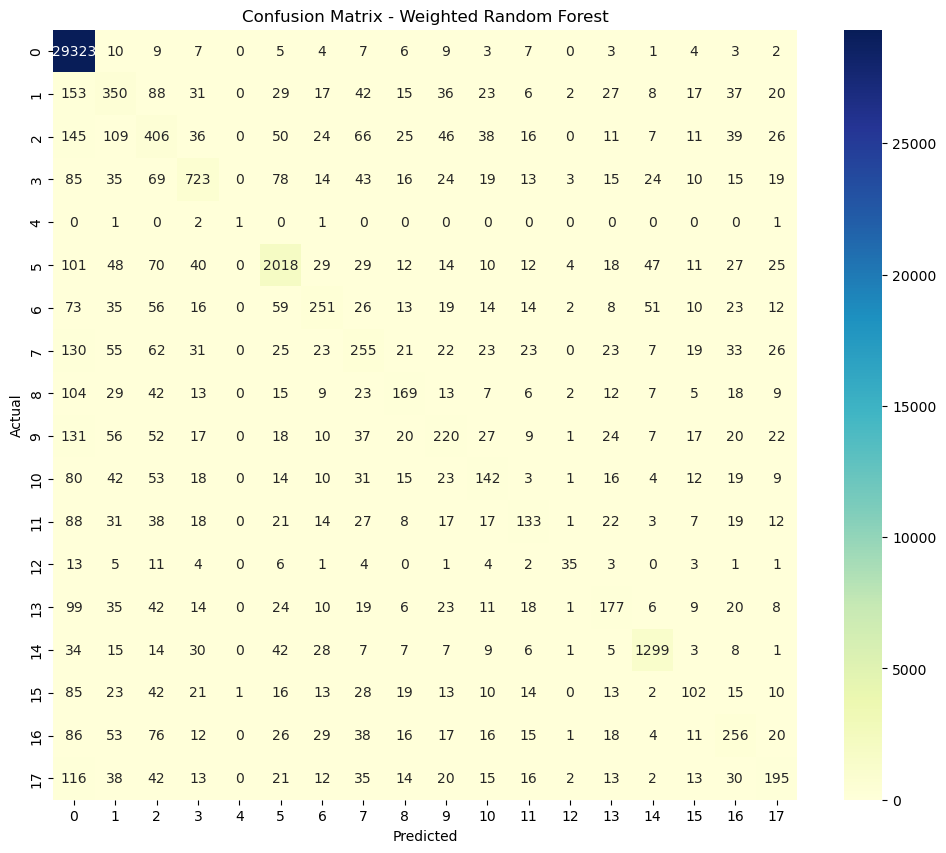

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Weighted Random Forest')
plt.show()


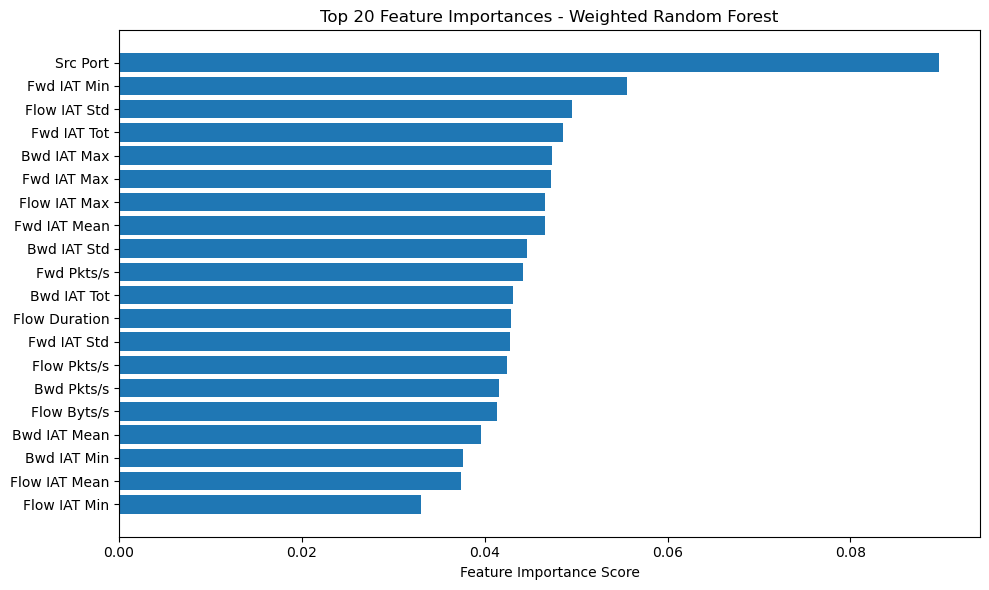

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = rf_weighted.feature_importances_
indices = np.argsort(importances)[::-1][:20]  # Top 20 features
features = X.columns

# Plot Top 20 Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance Score")
plt.title("Top 20 Feature Importances - Weighted Random Forest")
plt.tight_layout()
plt.show()
